## 課題 ボストン住宅価格 線形回帰

### 1. 線形回帰とは何か
以下の観点を全て含めて記述しましょう。

・線形回帰とは何か。  
・具体的に言うと？  
・分類と何が違うのか。  

#### 答え:
線形回帰とは、発生したある「結果」が、その様な結果に至る「原因」を、「線」の形を用いて分析する統計学の回帰分析のこと。  
回帰分析とは、結果を「目的変数」（あるいは従属変数）、原因を「説明変数」（あるいは独立変数）とし、それぞれの関係を「回帰式」を用いて調べること。  
  
具体的に言うと、結果となる目的変数を「y」、その原因とはる説明変数を「x」とし、それぞれの関係を「y = ax + b」あるいは「y = ax + bx + c」の形の回帰式で表す。  
その回帰式で表される線と、目的変数と説明変数がとる「点」との差を「距離」として測り、その距離が短い線を描けるようなモデルを構築することが、目的となる。  
そのモデル構築の手法としては、全ての点と線の距離を測る「最小２乗法」を用いることができる。  
最小２乗法を用いることにより、マイナスとなる値をマイナス同士の掛け合いでプラスになり、値を一律プラスに統一し、誤差を無くすことができる。  
  
分類との違いは、まず、「分類」は取得したデータをそれぞれ同一のグループに分けることであり、「分析」は分類されたデータ同士の関係や影響度合いを、統計学の知識や技術を用いて見つけ出すこと。  
つまり、データを「分類」し、分類されたデータを「分析」する。  
  
*参考文献:  
Diverのテキスト  
https://www.gixo.jp/blog/2373/  
https://ja.wikipedia.org/wiki/線形回帰  
https://kotobank.jp/word/回帰式-224364  
http://blogs.teradata.com/international/ja/hhg9/  
https://qiita.com/ishizakiiii/items/72be4ce16a10f97d6183  
https://ja.wikipedia.org/wiki/分類_(統計学)*  

#### 必要なライブラリをimportする

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### 2. データを取得する

In [141]:
%matplotlib inline
boston = load_boston()

### 3. 取得データをDataFrameにする

In [142]:
X = pd.DataFrame(boston.data[:100,:], columns = boston.feature_names)
y = pd.DataFrame(boston.target[:100])

### 4. 説明変数を'LSTAT'のみにする

In [143]:
x = X.loc[:, ['LSTAT']].as_matrix()

### 5. 単回帰と重回帰についての違いを記述せよ

#### 答え:
単回帰とは、原因とする「説明変数」を「一種類」、結果となる「目的変数」も「一種類」とし、その変数同士の関係を表すこと。  
つまり、一種類のデータから結果を分析あるいは予測すること。  
単回帰式は、一例として「y = ax + b」の形をとる。  
重回帰とは、原因とする「説明変数」を「複数種類」、結果となる「目的変数」を「一種類」とし、その変数同士の関係を表すこと。  
つまり、複数種類のデータから結果を分析あるいは予測すること。  
重回帰式は、一例として「y = ax + bx + c」の形をとる。  

*参考文献:  
Diverのテキスト  
http://www.ner.takushoku-u.ac.jp/masano/class_material/waseda/keiryo/9_reg1.html*

In [144]:
# X.head()
# y.head()

### 6. テストデータに分割する

In [145]:
# 雛形にある「X_train」は「x_train」、「X_test」は「x_test」、仮引数「X」は「x」に変更
# 理由は、「'LSTAT'」は変数「x」に代入しているため
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print('x_train:', x_train.shape, ', X_test:', x_test.shape, ', y_train:', y_train.shape, ', y_test:', y_test.shape)

x_train: (80, 1) , X_test: (20, 1) , y_train: (80, 1) , y_test: (20, 1)


### 7. 学習

In [146]:
lin_1d = LinearRegression()
lin_1d.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 8. 決定係数

In [147]:
score_1d = lin_1d.score(x_train, y_train)
# 決定係数は小数点以下３桁にしてみました。
print("一次式における'LSTAT'の住宅価格への決定係数は、　「%.3f"%(score_1d),"」")

一次式における'LSTAT'の住宅価格への決定係数は、　「0.581 」


### 9. 決定係数は何か記述せよ

#### 答え:
決定係数とは、説明変数と目的変数との関係度合いあるいは影響度合いを数字で表したもの。  
決定係数は、「R²」で表し、算出式は次の通り。  

> R² = 1 - ((目的変数 - 推測値)² / (目的変数 - 目的変数の平均値)²) 
  
この計算をデータの個数分実施するため、下記の式になる。  
  
> R² = 1 - (Σ(iからnまで)(目的変数i - 推測値i)²を個数で割る / Σ(iからnまで)(目的変数i - 目的変数の平均値i)²を個数で割る)  
  
推測値と目的変数の平均値の差が大きい場合は「０」に近く、その反対の場合は「１」に近くなる。  
つまり、１に近ければ、関係度合いあるいは影響度合いが高いことを表す。  
  
*参考文献:  
Diverのテキスト  
https://ja.wikipedia.org/wiki/決定係数*

### 10. 決定係数をいかなる場合も信じて良いか記述せよ（決定係数が高ければ、汎用性があるモデルと言えるか）

#### 答え:
決定係数が高いと言うことは、構築されたモデルが高い精度で予測できていることを表し、良いモデルと言えることもできる。  
しかし、これは学習に使用したデータに対して当てはまることであり、未知のデータに対しても高い精度で予測できるとは限らない。  
学習に使用したデータを過学習した特化型のモデルになっている可能性があり、未知のデータを与えた場合、精度の低い予測をしてしまう可能性がある。  
従って、決定係数が高ければ、汎用性があるモデルとは必ずしも言えない。 
  
*参考文献:  
Diverのテキスト  
https://ja.wikipedia.org/wiki/決定係数  
http://xica.net/magellan/marketing-idea/stats/about-coefficient-of-determination/*  

### 11. ２、３、４次式の回帰

In [148]:
# ５次式、６次式、７次式、１０次式も追加してみました。
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()
lin_5d = LinearRegression()
lin_6d = LinearRegression()
lin_7d = LinearRegression()
lin_10d = LinearRegression()

degree_2 = PolynomialFeatures(degree = 2)
degree_3 = PolynomialFeatures(degree = 3)
degree_4 = PolynomialFeatures(degree = 4)
degree_5 = PolynomialFeatures(degree = 5)
degree_6 = PolynomialFeatures(degree = 6)
degree_7 = PolynomialFeatures(degree = 7)
degree_10 = PolynomialFeatures(degree = 10)

x_train_2 = degree_2.fit_transform(x_train)
x_train_3 = degree_3.fit_transform(x_train)
x_train_4 = degree_4.fit_transform(x_train)
x_train_5 = degree_5.fit_transform(x_train)
x_train_6 = degree_6.fit_transform(x_train)
x_train_7 = degree_7.fit_transform(x_train)
x_train_10 = degree_10.fit_transform(x_train)

lin_2d.fit(x_train_2, y_train)
lin_3d.fit(x_train_3, y_train)
lin_4d.fit(x_train_4, y_train)
lin_5d.fit(x_train_5, y_train)
lin_6d.fit(x_train_6, y_train)
lin_7d.fit(x_train_7, y_train)
lin_10d.fit(x_train_10, y_train)

score_2d = lin_2d.score(x_train_2, y_train)
score_3d = lin_3d.score(x_train_3, y_train)
score_4d = lin_4d.score(x_train_4, y_train)
score_5d = lin_5d.score(x_train_5, y_train)
score_6d = lin_6d.score(x_train_6, y_train)
score_7d = lin_7d.score(x_train_7, y_train)
score_10d = lin_10d.score(x_train_10, y_train)

# 決定係数は小数点以下３桁にしてみました。
print("二次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_2d), "」")
print("三次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_3d), "」")
print("四次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_4d), "」")
print("五次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_5d), "」")
print("六次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_6d), "」")
print("七次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_7d), "」")
print("十次式における'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_10d), "」")

二次式における'LSTAT'の住宅価格への決定係数は、「0.702 」
三次式における'LSTAT'の住宅価格への決定係数は、「0.722 」
四次式における'LSTAT'の住宅価格への決定係数は、「0.734 」
五次式における'LSTAT'の住宅価格への決定係数は、「0.734 」
六次式における'LSTAT'の住宅価格への決定係数は、「0.738 」
七次式における'LSTAT'の住宅価格への決定係数は、「0.740 」
十次式における'LSTAT'の住宅価格への決定係数は、「0.748 」


### 12. 次数が大きくなるとどうなるか記述せよ

#### 回答:  
次数が大きくなると与えられたデータに良く反応するモデルが構築される。  
散布図と回帰式は、下記の通り。  
メリットとしては、データに良く反応しているため、表現力の高い予測が良くできるモデルとなる。  
デメリットとしては、ノイズと考えられる発生確率の少ないデータにも反応し、汎用的なモデルではなくなってしまう。 
下記の十次の回帰式において「LSTAT」が「25」のところでノイズと考えられるデータに反応している。

<function matplotlib.pyplot.plot>

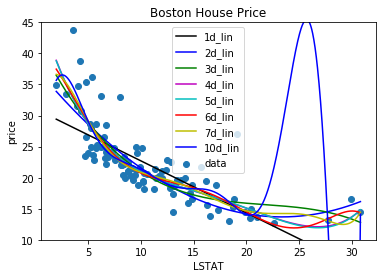

In [149]:
n = np.linspace(np.min(x), np.max(x), 1000)
y_1d_fit = lin_1d.predict(n[:, np.newaxis])
y_2d_fit = lin_2d.predict(degree_2.fit_transform(n[:, np.newaxis]))
y_3d_fit = lin_3d.predict(degree_3.fit_transform(n[:, np.newaxis]))
y_4d_fit = lin_4d.predict(degree_4.fit_transform(n[:, np.newaxis]))
y_5d_fit = lin_5d.predict(degree_5.fit_transform(n[:, np.newaxis]))
y_6d_fit = lin_6d.predict(degree_6.fit_transform(n[:, np.newaxis]))
y_7d_fit = lin_7d.predict(degree_7.fit_transform(n[:, np.newaxis]))
y_10d_fit = lin_10d.predict(degree_10.fit_transform(n[:, np.newaxis]))

plt.title("Boston House Price")
plt.scatter(x, y, label = "data")
plt.plot(n, y_1d_fit, "k", label = "1d_lin")
plt.plot(n, y_2d_fit, "b", label = "2d_lin")
plt.plot(n, y_3d_fit, "g", label = "3d_lin")
plt.plot(n, y_4d_fit, "m", label = "4d_lin")
plt.plot(n, y_5d_fit, "c", label = "5d_lin")
plt.plot(n, y_6d_fit, "r", label = "6d_lin")
plt.plot(n, y_7d_fit, "y", label = "7d_lin")
plt.plot(n, y_10d_fit, "b", label = "10d_lin")
plt.ylim(10, 45)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot

### 13. 重回帰

In [150]:
# 重回帰の説明変数として「RM」と「LSTAT」を使用
# RM: 一住居あたりの平均的な部屋の数
# LSTAT: ステータスの低い人口の割合
# これらを説明変数として使用する理由は、一次回帰において「RM」は決定係数が「0.707」、
#「LSTAT」は決定係数が「0.581」と全データの中で係数が最も高い特徴量のため

boston = load_boston()
Xm = pd.DataFrame(boston.data[:100,:], columns = boston.feature_names)
ym = pd.DataFrame(boston.target[:100])
xm = Xm.loc[:, ['RM', 'LSTAT']].as_matrix()
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size = 0.2, random_state = 0)

lin_1dm = LinearRegression()
lin_2dm = LinearRegression()
lin_3dm = LinearRegression()
lin_4dm = LinearRegression()

degree_2m = PolynomialFeatures(degree = 2)
degree_3m = PolynomialFeatures(degree = 3)
degree_4m = PolynomialFeatures(degree = 4)

xm_train_2 = degree_2.fit_transform(xm_train)
xm_train_3 = degree_3.fit_transform(xm_train)
xm_train_4 = degree_4.fit_transform(xm_train)

lin_1dm.fit(xm_train, ym_train)
lin_2dm.fit(xm_train_2, ym_train)
lin_3dm.fit(xm_train_3, ym_train)
lin_4dm.fit(xm_train_4, ym_train)

score_1dm = lin_1dm.score(xm_train, ym_train)
score_2dm = lin_2dm.score(xm_train_2, ym_train)
score_3dm = lin_3dm.score(xm_train_3, ym_train)
score_4dm = lin_4dm.score(xm_train_4, ym_train)

# 決定係数は小数点以下３桁にしてみました。
print("一次式における'RM'と'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_1dm), "」")
print("二次式における'RM'と'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_2dm), "」")
print("三次式における'RM'と'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_3dm), "」")
print("四次式における'RM'と'LSTAT'の住宅価格への決定係数は、「%.3f"%(score_4dm), "」")

一次式における'RM'と'LSTAT'の住宅価格への決定係数は、「0.811 」
二次式における'RM'と'LSTAT'の住宅価格への決定係数は、「0.882 」
三次式における'RM'と'LSTAT'の住宅価格への決定係数は、「0.887 」
四次式における'RM'と'LSTAT'の住宅価格への決定係数は、「0.899 」


In [151]:
nm = np.linspace(np.min(xm), np.max(xm), 1000)
y_1dm_fit = lin_1dm.predict(nm[:, np.newaxis])
y_2dm_fit = lin_2dm.predict(degree_2m.fit_transform(nm[:, np.newaxis]))
y_3dm_fit = lin_3dm.predict(degree_3m.fit_transform(nm[:, np.newaxis]))
y_4dm_fit = lin_4dm.predict(degree_4m.fit_transform(nm[:, np.newaxis]))

plt.title("Boston House Price")
plt.scatter(xm, ym, label = "data")
plt.plot(nm, y_1dm_fit, "k", label = "1d_lin")
plt.plot(nm, y_2dm_fit, "b", label = "2d_lin")
plt.plot(nm, y_3dm_fit, "g", label = "3d_lin")
plt.plot(nm, y_4dm_fit, "m", label = "4d_lin")
plt.ylim(10, 45)
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot

ValueError: shapes (1000,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

### 14. 重回帰について記述せよ

#### 答え:
説明変数を増やすことのメリットとして、決定係数の値を単回帰のときよりも高くすることができ、その分表現力の高いモデルを構築することができる。  
説明変数を増やすことのデメリットとして、学習に使用された特徴量にのみ良く反応してしまう汎用的でない過学習したモデルとなってしまうこともある。